In [1]:
from qiskit import QuantumCircuit

Let us investigate a quantum circuit. We are going to use the Qiskit framework to visualize the circuit.

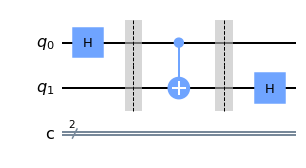

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.barrier()
qc.cnot(0,1)
qc.barrier()
qc.h(1)
qc.draw(output='mpl')

This is what the circuit does: The first Hadamard gate brings the first qubit into superposition. The first qubit then controls the second qubit and flips it when it is 1. The second Hadamard gate brings the second qubit into superposition such that we have all the possible configurations of basis vectors in the end.

An intuitive way of understanding what happens with a quantum circuit is to think of all the possible quantum states within a discrete time frame as a **_graph_**. Let's go step by step to see how the quantum state evolves with every gate using the example circuit above.

Every graph node respresents a quantum state. The edges that connect the nodes carry the probability of landing in the destination node. At the beginning, we start with the state $|00\rangle$. It is only one single node:

<img src="./g1.png" alt="Drawing" style="width: 100px;"/>

The first operation is a Hadamard gate. The Hadamard gate on the first gate will bring the first qubit into superposition, like this: $|00\rangle \rightarrow \mathcal{H}|00\rangle = 1/\sqrt(2)(|00\rangle + |10\rangle)$. In other words, the first qubit is 0 with 50% probability and 1 is with 50% probability. We can think of this as two different _paths_, diverging from the start. We are going to see at the end of the circuit that a definite path will be the final quantum state.

<img src="./g2.png" alt="Drawing" style="width: 200px;"/>

Next, we apply the CNOT gate. The first qubit controls the second qubit, so we have: $\frac{1}{\sqrt{2}}(|00\rangle + |10\rangle) \rightarrow CNOT \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. Since the CNOT operation does not change the amplitudes of the quantum state, the probability that we land in a purple node from a red node will be 1. In order to calculate the probability of having one of the quantum states in the graph leaves (i.e. the nodes in the last layer of the graph), we just traverse back to the orange root node $|00\rangle$. For example, the probability of having the quantum state $|00\rangle$ (or $|10\rangle$) in the end is $1/2 * 1 = 1/2$.

<img src="./g3.png" alt="Drawing" style="width: 200px;"/>

Now we apply the second Hadamard gate on the _second_ qubit. This operation will bring the second qubit into superposition, just like with the first qubit in the beggining. The tree will now expand to its full breadth, covering all basis vectors from the computational basis $\{ |00\rangle, |01\rangle, |10\rangle, |11\rangle\}$.

<img src="./g4.png" alt="Drawing" style="width: 300px;"/>

We can read out the probabilities from the graph again: The probability that the quantum circuit yields the basis state $|00\rangle$ (and equally for all the other basis states) is $1/2 * 1 * 1/2 = 1/4$. Now comes the most interesting part of the circuit: The measurement. Let's measure the first qubit. The measurement outcome will either be 1 or 0.

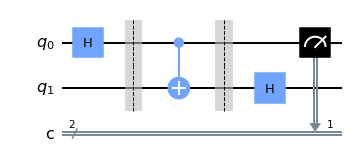

In [3]:
qc.measure(0,1) # measure the first qubit and store the classical outcome in a classical register
qc.draw(output="mpl")

According to the outcome, we modify the graph structure to clearly mark the possible